# Processamento inicial dos dados e construção de um CSV legível

In [31]:
import pandas as pd

In [32]:
dic   = pd.read_excel('dicionario.xls', dtype = str)
sizes = dic[~dic['size'].isna()]
sizes = sizes['size'].values.tolist()
sizes = [int(x) for x in sizes]

names = dic[~dic['code'].isna()]
names = names.loc[~names['code'].duplicated(keep='first')]

In [33]:
#type(names)
#sizes[0]
df = pd.read_fwf('PNS_2019.txt', widths=sizes, names=names['code'])

In [34]:
df.to_csv('PNS_2019.csv')

# preprocessamento
Essa etapa requer a presença do arquivo <span style = "color: rgb(20,170,50)">**PNS_2019.csv**</span>

In [35]:
import pandas as pd
import datetime

In [36]:
df  = pd.read_csv('PNS_2019.csv')
dic = pd.read_excel('pre_proc_dicionario.xls')

## Criação do dataset preprocessado

In [37]:
codes = dic.code.dropna()
df = df[dic.code.dropna().tolist()]

In [38]:
df.to_csv('pre_proc_dataset.csv')

## Renomear colunas

In [39]:
names = dic[~dic['name'].isna()]
names = names.loc[~names['name'].duplicated(keep='first')]
df.set_axis(names['name'], axis=1, inplace=True)

In [40]:
df['exercicio'].isnull().sum()

257328

In [41]:
df.to_csv('pre_proc_dataset.csv', index=False)

## Processar colunas

In [42]:
df = pd.read_csv('pre_proc_dataset.csv')

In [43]:
now = datetime.datetime.now()

In [44]:
def calculate_age(row):
    if pd.isna(row['nascimento']):
        return pd.NaT
    elif row['nascimento'] == 9999:
        return 9999
    else:
        birth_year = int(row['nascimento'])
        age = now.year - birth_year
        return age

In [45]:
df['altura'] = df[['alt_1', 'alt_2', 'alt_f']].mean(axis=1)
df['peso'] = df[['peso_1', 'peso_2', 'peso_f']].mean(axis=1)
df['imc'] = df['peso'] / (df['altura'] ** 2)

df['idade'] = df.apply(lambda row: calculate_age(row), axis=1)

df = df.drop(['alt_1', 'alt_2', 'alt_f','peso_1', 'peso_2', 'peso_f', 'altura', 'peso', 'nascimento', 'imc', 'exercicio'], axis=1)


In [46]:
df.to_csv('pre_proc_dataset.csv', index=False)

# Exploração inicial
Essa etapa requer o arquivo <span style = "color: rgb(20,170,50)">**pre_proc_dataset.csv**</span>

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Informações Basicas

In [55]:
df = pd.read_csv('pre_proc_dataset.csv')
df.head()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
0,11,2.0,1.0,3.0,6.0,3.0,7.0,2.0,0.0,3.0,...,NaN,NaN,NaN,3.0,1.0,1.0,NaN,NaN,2.0,60.0
1,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,73.0
2,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,36.0
3,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0
4,11,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,9999.0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uf              293726 non-null  int64  
 1   sexo            279382 non-null  float64
 2   verd/legu       90846 non-null   float64
 3   carne_verm      90846 non-null   float64
 4   carne_fran      90846 non-null   float64
 5   carne_peix      90846 non-null   float64
 6   tomar_suco      90846 non-null   float64
 7   suco_tipo       30696 non-null   float64
 8   suco_natu       90846 non-null   float64
 9   frutas          90846 non-null   float64
 10  refri           90846 non-null   float64
 11  refri_tipo      41184 non-null   float64
 12  leite           90846 non-null   float64
 13  leite_tipo      63104 non-null   float64
 14  doces           90846 non-null   float64
 15  lanches         90846 non-null   float64
 16  consum_sal      90846 non-null   float64
 17  feijao    

In [57]:
df.describe()

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
count,293726.000000,279382.000000,90846.000000,90846.000000,90846.000000,90846.000000,90846.000000,30696.000000,90846.000000,90846.000000,...,4905.000000,4905.000000,4905.000000,90846.000000,88736.000000,82881.000000,4905.000000,7101.000000,279210.000000,279382.000000
mean,28.844716,1.518788,4.398058,3.307939,2.895725,1.105673,1.196574,1.996123,2.597407,4.020188,...,1.938634,1.899694,1.939246,2.165544,1.731214,1.837466,33.613660,50.265033,3.197174,622.253685
std,11.762108,0.499648,2.460666,2.072346,1.770469,1.501453,2.092730,0.225044,2.409686,2.500836,...,0.240025,0.300438,0.238903,0.753347,0.443331,0.368942,16.116982,15.065001,1.504282,2337.288348
min,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000
25%,21.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,22.000000,42.000000,2.000000,22.000000
50%,27.000000,2.000000,5.000000,3.000000,3.000000,1.000000,0.000000,2.000000,2.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,32.000000,51.000000,3.000000,40.000000
75%,35.000000,2.000000,7.000000,5.000000,4.000000,2.000000,2.000000,2.000000,4.000000,7.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,44.000000,60.000000,4.000000,60.000000
max,53.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000,7.000000,7.000000,...,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,92.000000,97.000000,7.000000,9999.000000


# Processamento inicial

## Remoção inicial de linhas

In [58]:
# remover todas as linhas que não tem valores em diabetes
df.dropna(subset=['diabetes'], inplace=True)

In [59]:
# remover todas as linhas que não tem a idade de quem tem diabetes
df = df.drop(df[(df['diabetes'] == 1) & (df['diabetes_idade'].isna())].index)

In [60]:
df = df.drop(df[(df['hipertensao'].isna())].index)

In [61]:
df = df.drop(df[(df['colesterol'].isna())].index)

In [62]:
df = df.drop(df[(df['renda'].isna())].index)

In [63]:
# remover as linhas com valores inválidos para a idade 
df.drop(df[df['idade'] == -7976].index, inplace=True)

In [64]:
df.to_csv('proc_dataset[dropped_lines].csv', index=False)

## Correlações

In [65]:
df = pd.read_csv('proc_dataset[dropped_lines].csv')

In [66]:
corr = df.corr()
corr.to_csv('correlation.csv')
corr

,uf,sexo,verd/legu,carne_verm,carne_fran,carne_peix,tomar_suco,suco_tipo,suco_natu,frutas,...,esquizo,transt_bipol,Transt_toc,saude,hipertensao,colesterol,medic_doenc,diabetes_idade,renda,idade
uf,1.000000,-0.004808,0.190246,0.177948,-0.008226,-0.277938,0.090627,-0.037502,-0.110670,0.068536,...,0.056925,-0.037724,-0.045278,-0.084478,-0.036098,-0.010677,0.016891,0.003172,0.256794,-0.062889
sexo,-0.004808,1.000000,0.073280,-0.143967,0.054692,-0.001329,-0.024957,-0.017247,0.039888,0.120496,...,0.140668,0.049337,0.011933,0.069190,-0.077640,-0.092535,0.052473,0.004227,-0.063167,-0.014854
verd/legu,0.190246,0.073280,1.000000,0.061768,0.044718,0.004285,-0.053886,-0.034454,0.175397,0.359188,...,0.049856,0.050238,0.016353,-0.104845,-0.046534,-0.033077,0.117071,0.026255,0.247006,-0.030554
carne_verm,0.177948,-0.143967,0.061768,1.000000,-0.198646,-0.218354,0.080065,0.013416,-0.010090,-0.027087,...,0.038333,0.001728,0.004947,-0.086945,0.064376,0.052322,-0.047551,-0.036081,0.110602,-0.004211
carne_fran,-0.008226,0.054692,0.044718,-0.198646,1.000000,0.035381,0.027855,0.000550,0.065652,0.057214,...,0.015161,0.016181,0.024679,0.002912,-0.022205,-0.016059,-0.015043,-0.016780,-0.038677,0.013421
carne_peix,-0.277938,-0.001329,0.004285,-0.218354,0.035381,1.000000,-0.069345,0.009005,0.120400,0.079905,...,-0.022353,0.030906,0.013752,0.016758,-0.022008,-0.014547,0.053376,0.028902,-0.053511,0.039194
tomar_suco,0.090627,-0.024957,-0.053886,0.080065,0.027855,-0.069345,1.000000,-0.009630,-0.206421,-0.110914,...,-0.038668,-0.051520,-0.009228,-0.010637,0.057107,0.058329,-0.110968,-0.065654,-0.114237,0.000351
suco_tipo,-0.037502,-0.017247,-0.034454,0.013416,0.000550,0.009005,-0.009630,1.000000,0.017288,-0.055273,...,-0.014591,0.005010,-0.010922,-0.002681,0.050442,0.042206,-0.072437,-0.079322,-0.106649,0.012245
suco_natu,-0.110670,0.039888,0.175397,-0.010090,0.065652,0.120400,-0.206421,0.017288,1.000000,0.261150,...,0.006160,0.023113,0.009957,-0.052035,0.013893,0.001031,0.029395,0.001615,0.064876,0.005617
frutas,0.068536,0.120496,0.359188,-0.027087,0.057214,0.079905,-0.110914,-0.055273,0.261150,1.000000,...,0.042164,0.039657,0.008765,-0.074163,-0.070713,-0.067893,0.146126,0.078613,0.237609,-0.023139


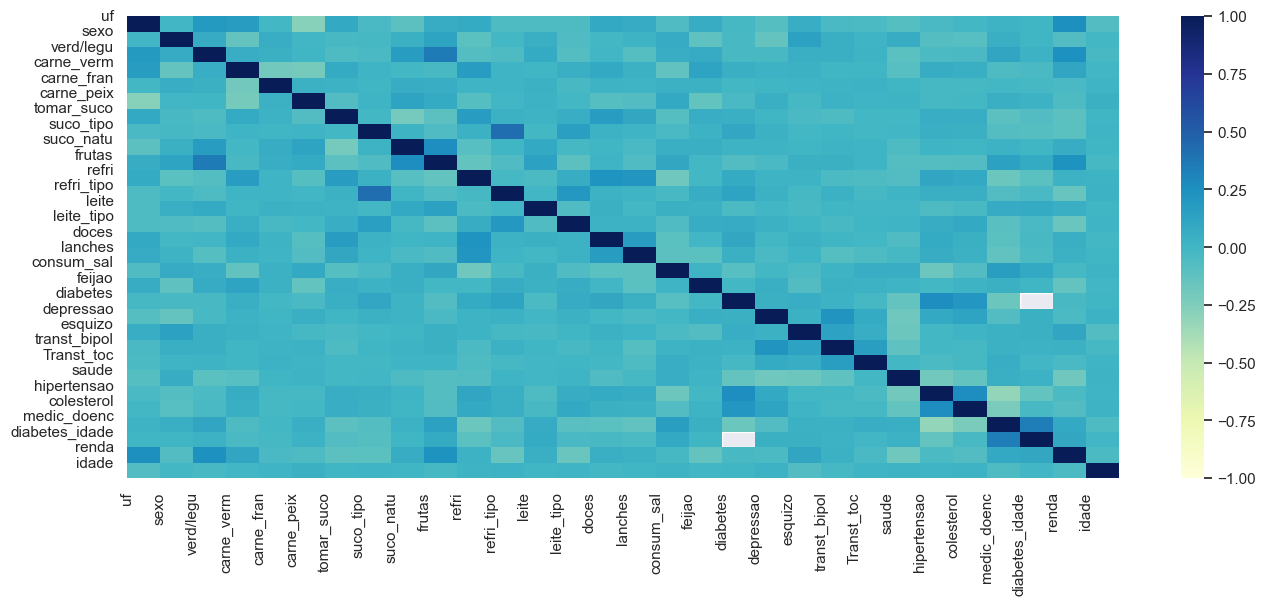

In [67]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [68]:
df.corrwith(df["diabetes"])

uf               -0.022461
sexo             -0.028438
verd/legu        -0.027131
carne_verm        0.051368
carne_fran       -0.011770
carne_peix       -0.031595
tomar_suco        0.054038
suco_tipo         0.104566
suco_natu         0.018369
frutas           -0.067618
refri             0.083821
refri_tipo        0.129313
leite            -0.046277
leite_tipo        0.073548
doces             0.097365
lanches           0.042461
consum_sal       -0.092721
feijao           -0.015387
diabetes          1.000000
depressao         0.041089
esquizo           0.059118
transt_bipol      0.024078
Transt_toc       -0.022694
saude            -0.142423
hipertensao       0.261631
colesterol        0.206285
medic_doenc      -0.169297
diabetes_idade         NaN
renda            -0.026944
idade             0.000127
dtype: float64

## checagem de valores ausentes

In [69]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:
suco_tipo : True -> 54763
refri_tipo : True -> 45232
leite_tipo : True -> 23944
esquizo : True -> 76263
transt_bipol : True -> 76263
Transt_toc : True -> 76263
medic_doenc : True -> 76263
diabetes_idade : True -> 73904


In [70]:
# quantos dados temos no dataset
len(df.index)

80928

In [71]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

7024

In [72]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

73904

## separação dos dados com mesma proporção de indivíduos com diabetes e sem diabetes

In [73]:
dados_1 = df[df['diabetes'] == 1]
dados_2 = df[df['diabetes'] == 2]
total_instancias_1 = len(dados_1)
dados_2_selecionados = dados_2.sample(n=total_instancias_1, random_state=12)
df = pd.concat([dados_1, dados_2_selecionados])

In [74]:
# quantos individuos com diabetes confirmada
len(df[df['diabetes'] == 1].index)

7024

In [75]:
# quantos individuos com diabetes negada
len(df[df['diabetes'] == 2].index)

7024

<Axes: xlabel='diabetes', ylabel='count'>

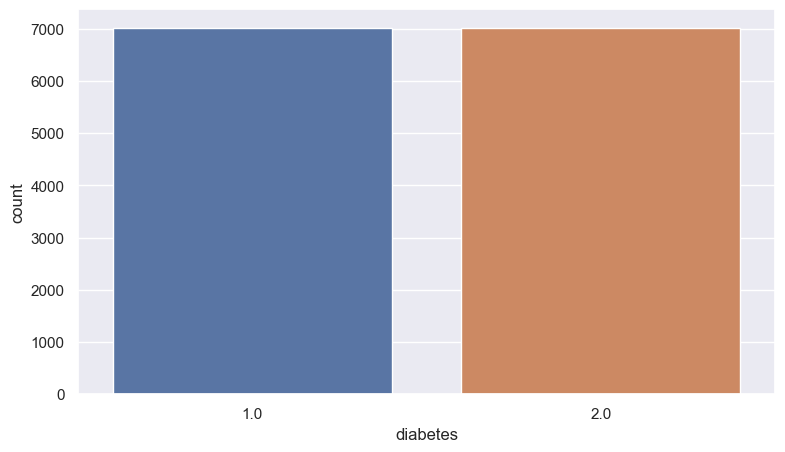

In [76]:
# em gráfico

sns.set()
sns.set(rc = {'figure.figsize':(9,5)})
sns.countplot(x="diabetes",data=df)

In [77]:
df.to_csv('proc_dataset[balanced].csv', index=False)

## Remoção de colunas com muitos valores nulos

In [78]:
df = pd.read_csv('proc_dataset[balanced].csv')

In [79]:
df.drop(['esquizo', 'transt_bipol', 'Transt_toc', 'medic_doenc','suco_tipo', 'leite_tipo', 'refri_tipo'],axis=1, inplace=True)

In [80]:
df.to_csv('proc_dataset[null_cull].csv', index=False)

## Análise numérica

In [81]:
df = pd.read_csv('proc_dataset[null_cull].csv')

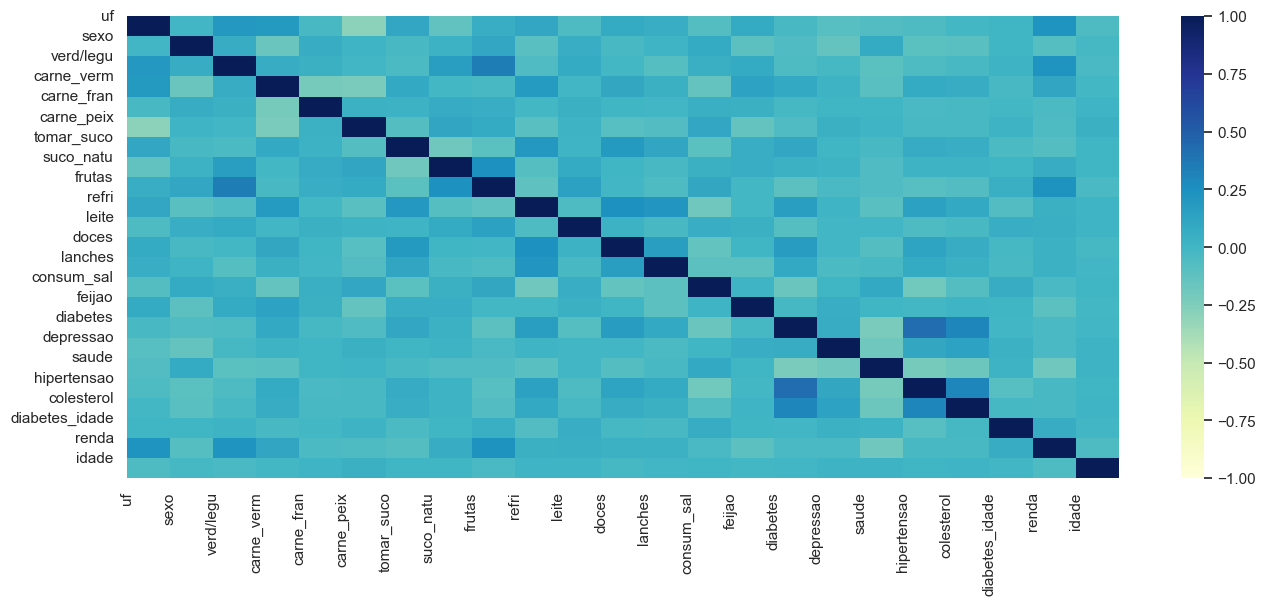

In [129]:
sns.heatmap(df.corr(), vmin=-1, vmax=+1, cbar=True, cmap='YlGnBu')
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.show()

In [83]:
# Variabilidade de cada variável

df.std()

uf                  11.400517
sexo                 0.495539
verd/legu            2.425504
carne_verm           2.085964
carne_fran           1.810314
carne_peix           1.483644
tomar_suco           1.953500
suco_natu            2.439063
frutas               2.472927
refri                1.622247
leite                3.031561
doces                2.016463
lanches              1.019396
consum_sal           0.763232
feijao               2.331533
diabetes             0.500018
depressao            0.321972
saude                0.811419
hipertensao          0.497931
colesterol           0.447876
diabetes_idade      14.990045
renda                1.509028
idade             1909.514531
dtype: float64

uf : 0.2926895981638667
sexo : -0.26952692084372726
verd/legu : -0.4427511752180355
carne_verm : 0.4487925397234023
carne_fran : 0.578575066526454
carne_peix : 1.8002974095622803
tomar_suco : 2.0707498657550576
suco_natu : 0.6058896668528555
frutas : -0.3340988138103519
refri : 2.281885299722687
leite : -0.19419959089319186
doces : 1.626390765009175
lanches : 3.885384926745205
consum_sal : 0.014384474247402855
feijao : -0.8309935751979282
diabetes : 0.0
depressao : -2.376600838743371
saude : 0.6283513509908871
hipertensao : -0.18330144971994208


c:\Users\victor.cunha\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


colesterol : -0.9928680852582703
diabetes_idade : -0.7003723911064068
renda : 0.4526788105258313
idade : 4.80647163642579


<Figure size 2000x1500 with 0 Axes>

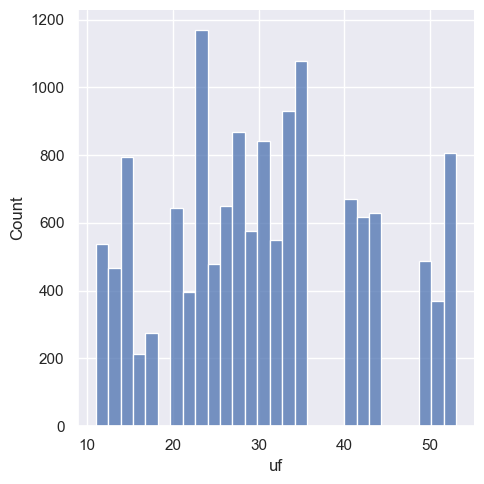

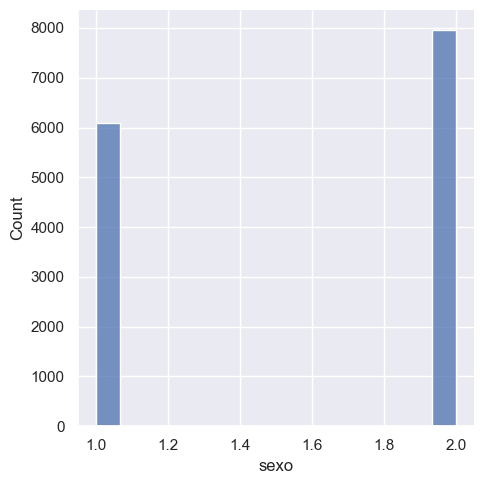

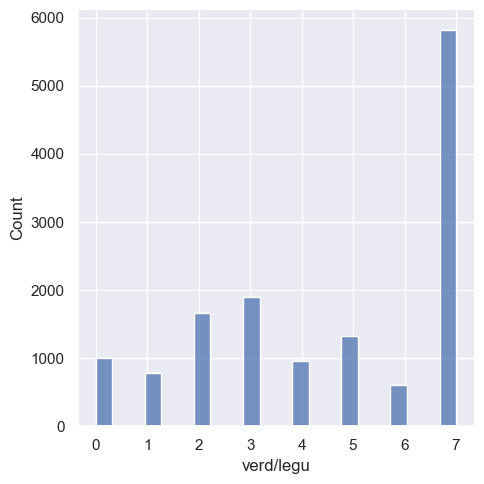

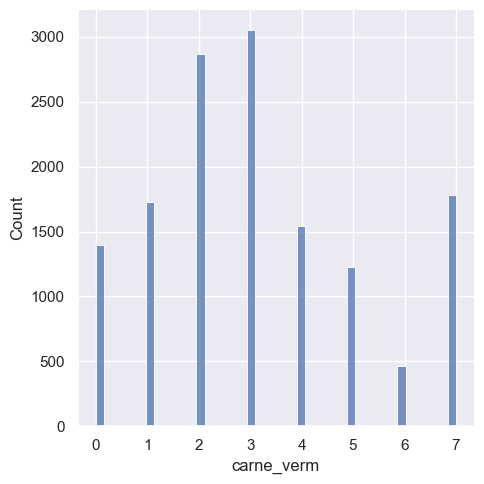

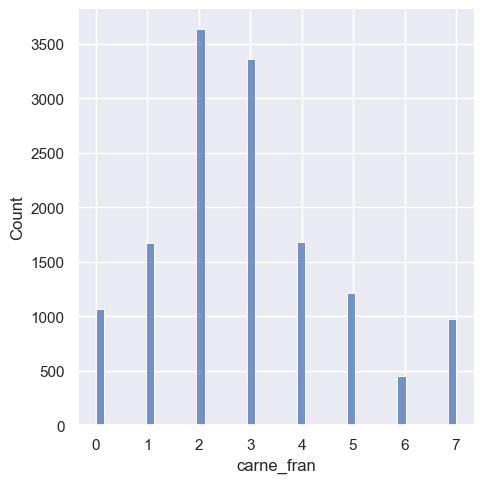

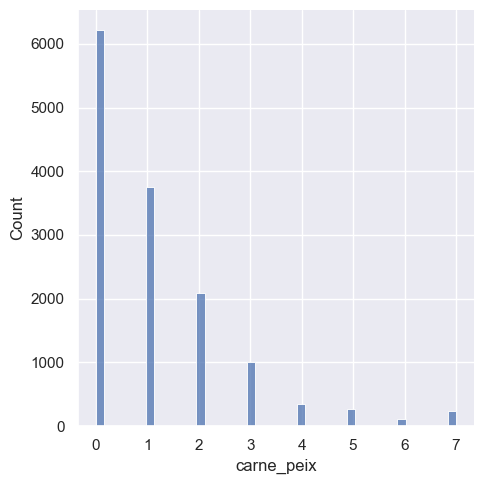

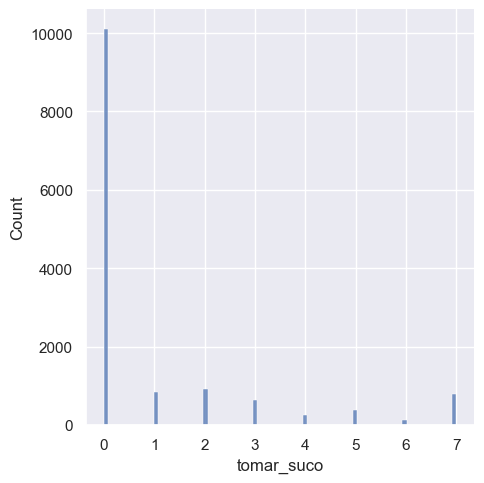

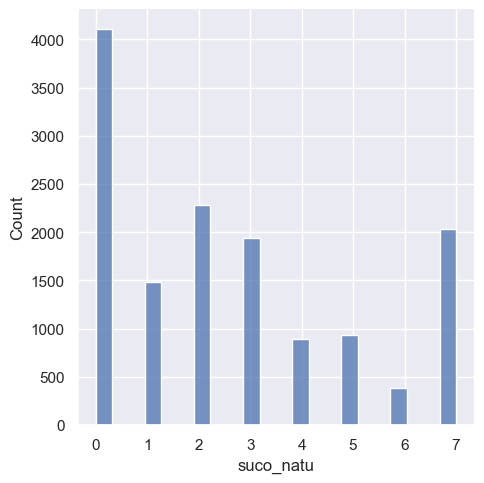

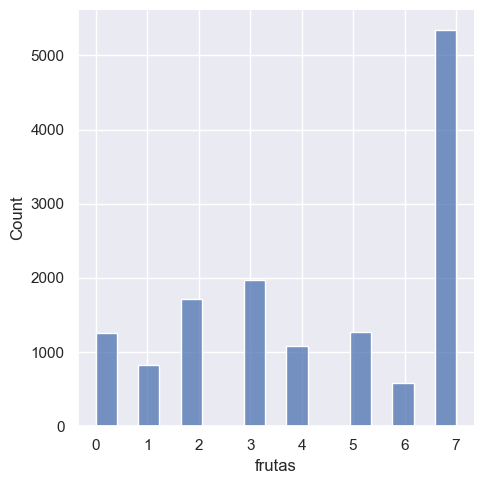

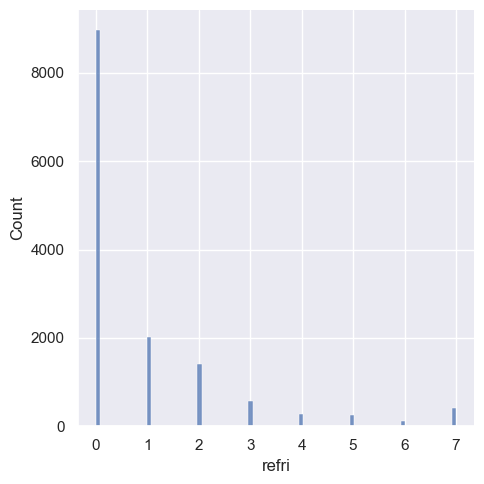

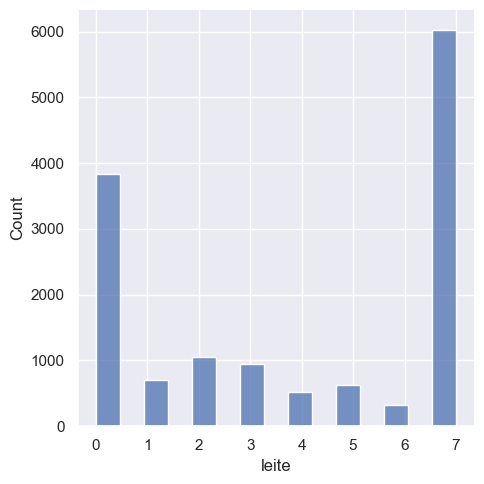

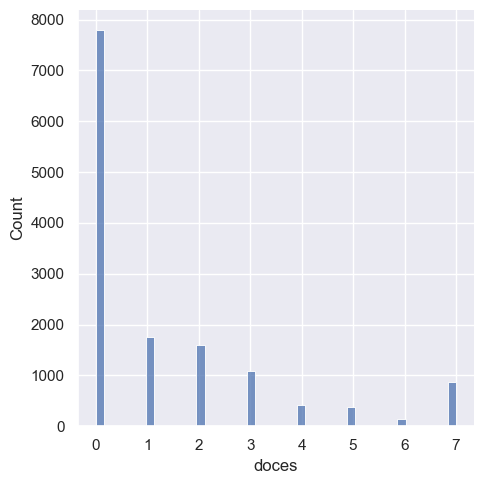

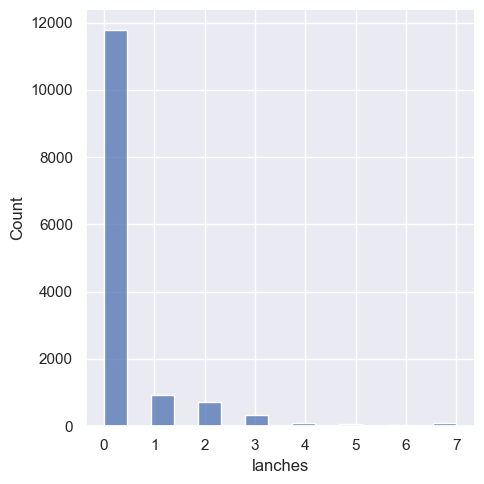

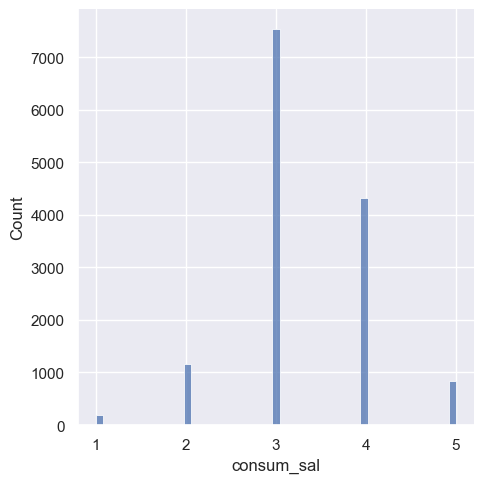

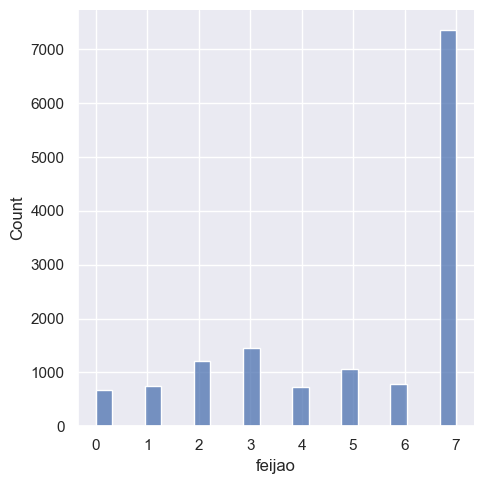

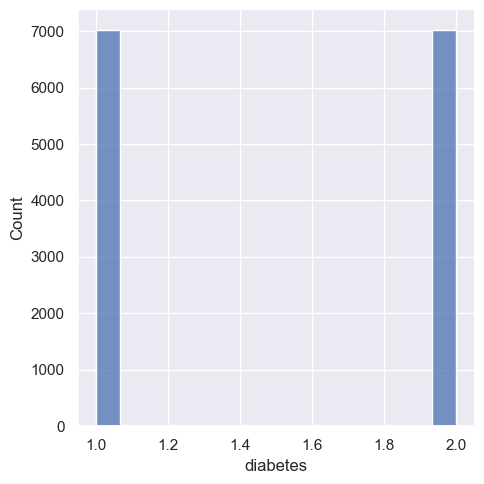

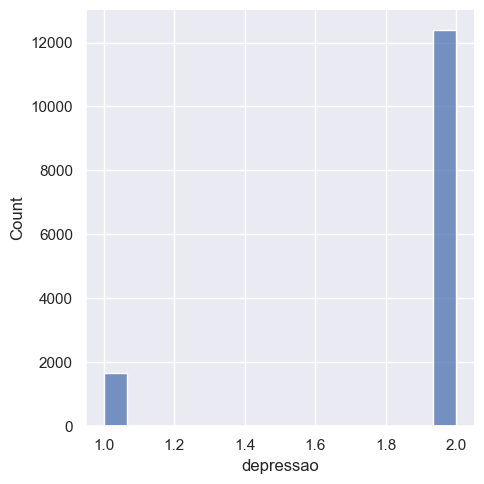

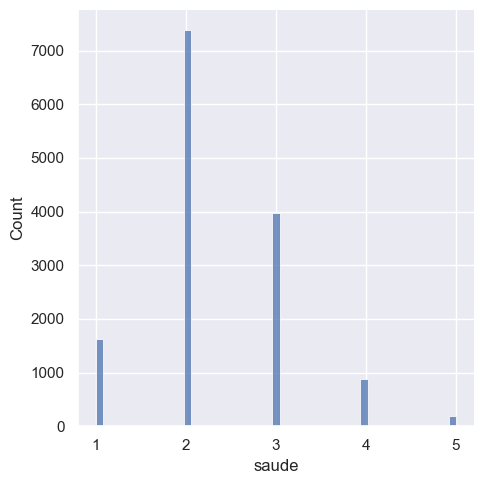

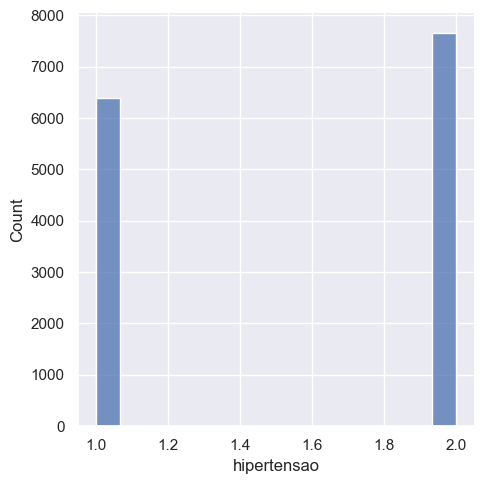

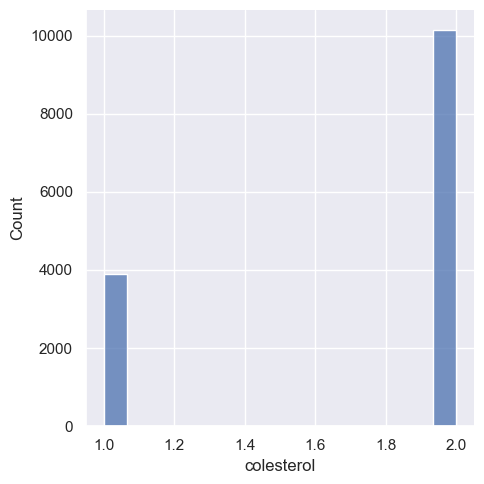

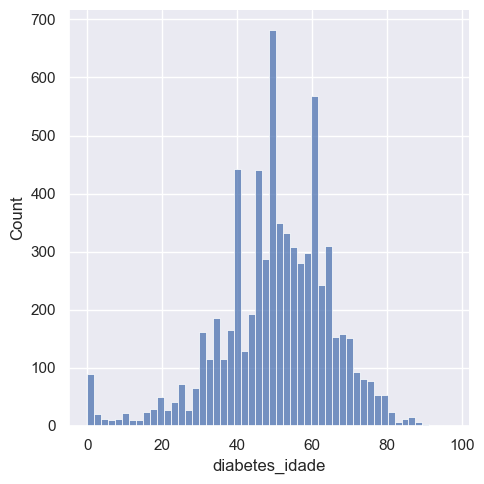

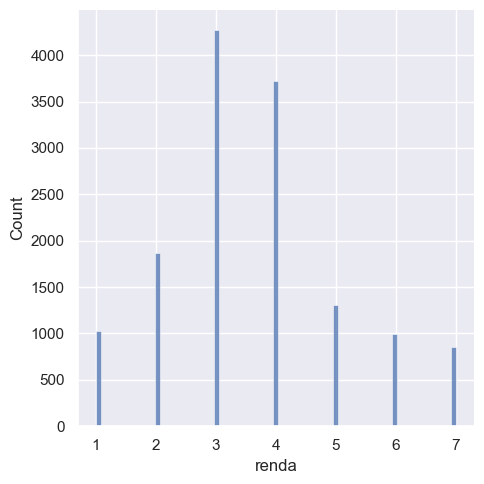

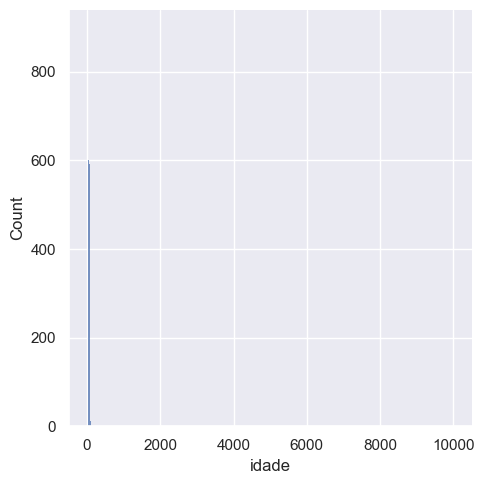

In [84]:
# Verificar as distribuições normais entre as variáveis contínuas

plt.figure(figsize=(20,15))
j=1
for i in df.columns:
    if df[i].dtypes == 'float64' or df[i].dtypes == 'int64':
        sns.displot(df[i])
        #plt.subplot(2,3,j)
        j+=1
        print(df[i].name, ':', df[i].skew())
#plt.tight_layout()
plt.show()

C:\Users\victor.cunha\AppData\Local\Temp\ipykernel_9260\649511651.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Density plot')

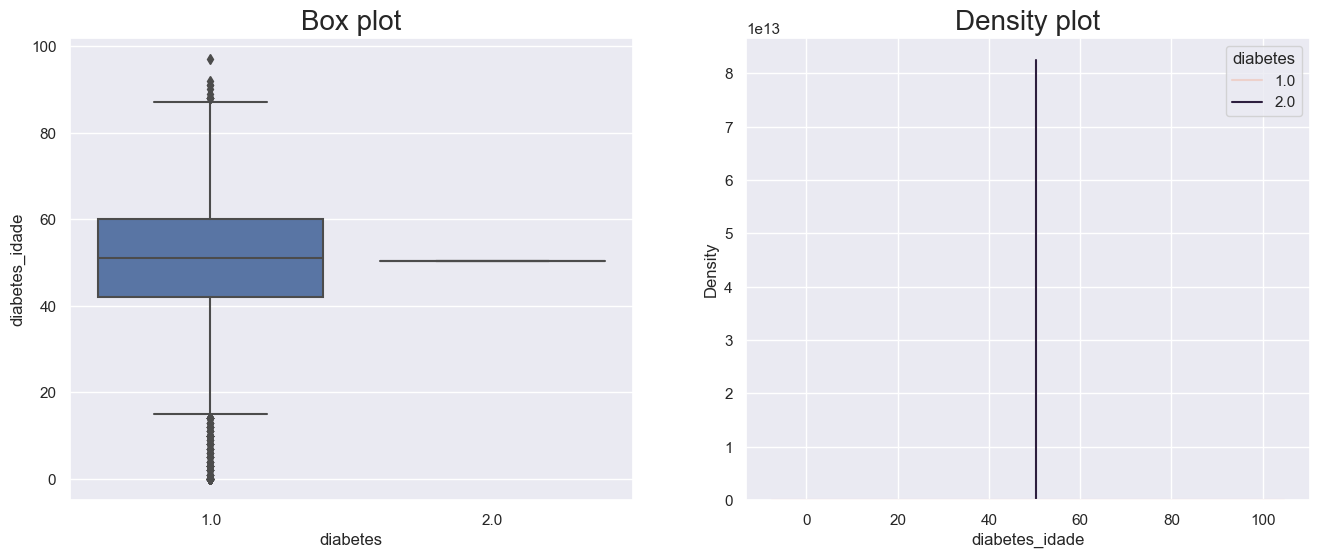

In [128]:
sns.set(rc = {'figure.figsize':(16,6)})
plt.plot(figure_size = (1,2))

# Boxplots
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x="diabetes", y="diabetes_idade", data=df)
bp_ax.set_title('Box plot', fontsize = 20)

# Função Densidade de Probabilidade
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x='diabetes_idade', hue='diabetes', data=df)
dp_ax.set_title('Density plot', fontsize = 20)

# Boxplots: Distribuição do atributo (age) para cada classe de saída (survived), além de fornecer informações sobre os outliers
# Gráficos de densidade : Distribuição e a forma da distribuição (semelhante a normal ou qualquer outra distribuição) do atributo
# Gráficos de contagem empilhados: Informa sobre a contagem de cada categoria do atributo, e com informações sobre a porcentagem de cada categoria

In [86]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].max())

Valores ausentes (NaN) em:
uf : False -> 53
sexo : False -> 2.0
verd/legu : False -> 7.0
carne_verm : False -> 7.0
carne_fran : False -> 7.0
carne_peix : False -> 7.0
tomar_suco : False -> 7.0
suco_natu : False -> 7.0
frutas : False -> 7.0
refri : False -> 7.0
leite : False -> 7.0
doces : False -> 7.0
lanches : False -> 7.0
consum_sal : False -> 5.0
feijao : False -> 7.0
diabetes : False -> 2.0
depressao : False -> 2.0
saude : False -> 5.0
hipertensao : False -> 2.0
colesterol : False -> 2.0
diabetes_idade : True -> 97.0
renda : False -> 7.0
idade : False -> 9999.0


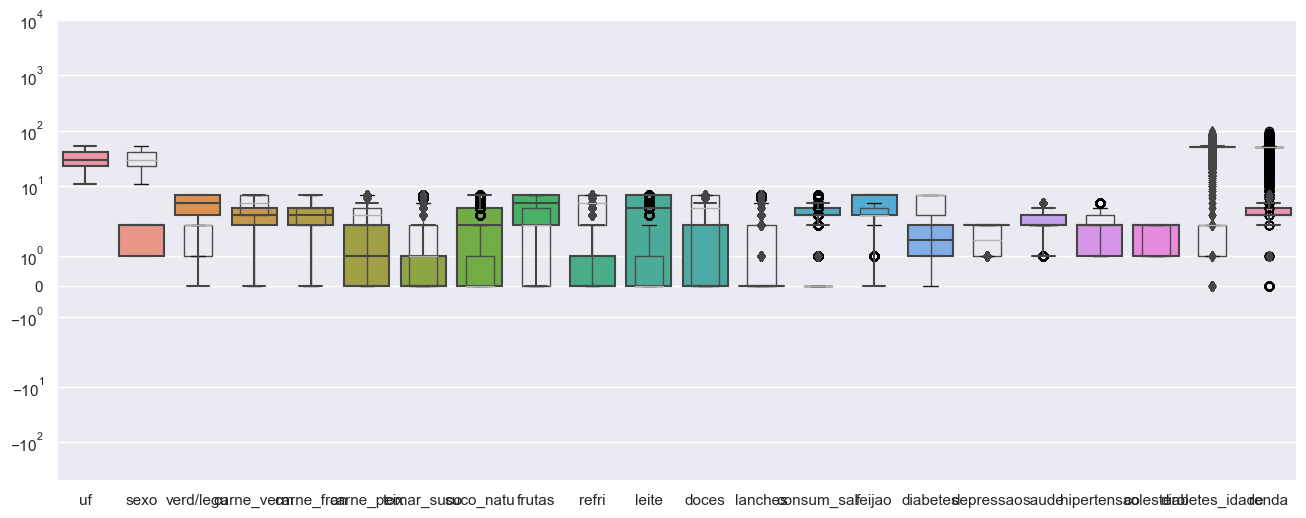

In [126]:
# Boxplot de todos os atributos contínuos antes da padronização

df.boxplot()
cols = [col for col in df.columns if col != 'idade']
sns.boxplot(data=df[cols])
plt.yscale('symlog')

In [127]:
print('Valores ausentes (NaN) em:')
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    if(any(df[col].isna())):
        print(col,':', any(df[col].isna()), "->", df[col].isnull().sum())

Valores ausentes (NaN) em:


# treinando o modelo

In [93]:
df['diabetes_idade'].fillna(df['diabetes_idade'].mean(), inplace=True)

In [89]:
import numpy as np
from sklearn.model_selection import train_test_split

In [94]:
x = df.drop(columns=['diabetes'], axis=1)
y = df['diabetes']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [96]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [121]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [116]:
predictions = clf.predict(x_test)

## métricas

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [122]:
print(confusion_matrix(y_test, y_pred))

[[1682  417]
 [ 822 1294]]


In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.67      0.80      0.73      2099
         2.0       0.76      0.61      0.68      2116

    accuracy                           0.71      4215
   macro avg       0.71      0.71      0.70      4215
weighted avg       0.71      0.71      0.70      4215



In [125]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

Acurácia: 0.706049822064057
